# Tensorboard dev / Custom Visualization Template

This is a template to create custom visualization in Tensorboard dev (https://tensorboard.dev/)

## 1. Setup

In [1]:
# Basic imports
from packaging import version
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
import numpy as np

In [2]:
# TensorBoard version
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.12.3


## 2. Training

In [3]:
# Logging into TensorBoard.dev and retrieving data
experiment_id = "AXeYd8OLR9mLWONig7Gu4w"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df.shape
df

,run,tag,step,value
0,tcn_100_16_0.001_20230608_160306,test/batch_dc,1,0.000038
1,tcn_100_16_0.001_20230608_160306,test/batch_dc,2,0.000043
2,tcn_100_16_0.001_20230608_160306,test/batch_dc,3,0.000047
3,tcn_100_16_0.001_20230608_160306,test/batch_dc,4,0.000012
4,tcn_100_16_0.001_20230608_160306,test/batch_esr,1,2.100980
5,tcn_100_16_0.001_20230608_160306,test/batch_esr,2,1.681580
6,tcn_100_16_0.001_20230608_160306,test/batch_esr,3,1.438185
7,tcn_100_16_0.001_20230608_160306,test/batch_esr,4,0.876736
8,tcn_100_16_0.001_20230608_160306,test/batch_l1,1,0.124180
9,tcn_100_16_0.001_20230608_160306,test/batch_l1,2,0.135942


In [4]:
# Change the metadata in tensorboard.dev
! tensorboard dev update-metadata --experiment_id {experiment_id} --description "Batch size = 16, Loss function: STFT Learning Rate = 0.001"

2023-06-08 16:28:54.854828: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Check the unique values by 'run'
print(df["run"].unique())

# Counting and sorting unique values to know how many scalars have been recorded
counts = df['run'].value_counts()
runs = counts.index.tolist()

['tcn_100_16_0.001_20230608_160306' 'tcn_25_16_0.001_20230608_160134'
 'tcn_50_16_0.001_20230608_160216']


In [6]:
# Listing the tags that represent each scalar type
print(df["tag"].unique())

['test/batch_dc' 'test/batch_esr' 'test/batch_l1' 'test/batch_snr'
 'test/global_dc' 'test/global_esr' 'test/global_l1' 'test/global_snr']


In [7]:
# Create a dictionary of dataframes, split by "tag" values
df_dict = {tag: df[df["tag"] == tag] for tag in df["tag"].unique()}

# This creates a dictionary where keys are the unique "tag" values
# And the values are the respective dataframes
df_dict.keys()


dict_keys(['test/batch_dc', 'test/batch_esr', 'test/batch_l1', 'test/batch_snr', 'test/global_dc', 'test/global_esr', 'test/global_l1', 'test/global_snr'])

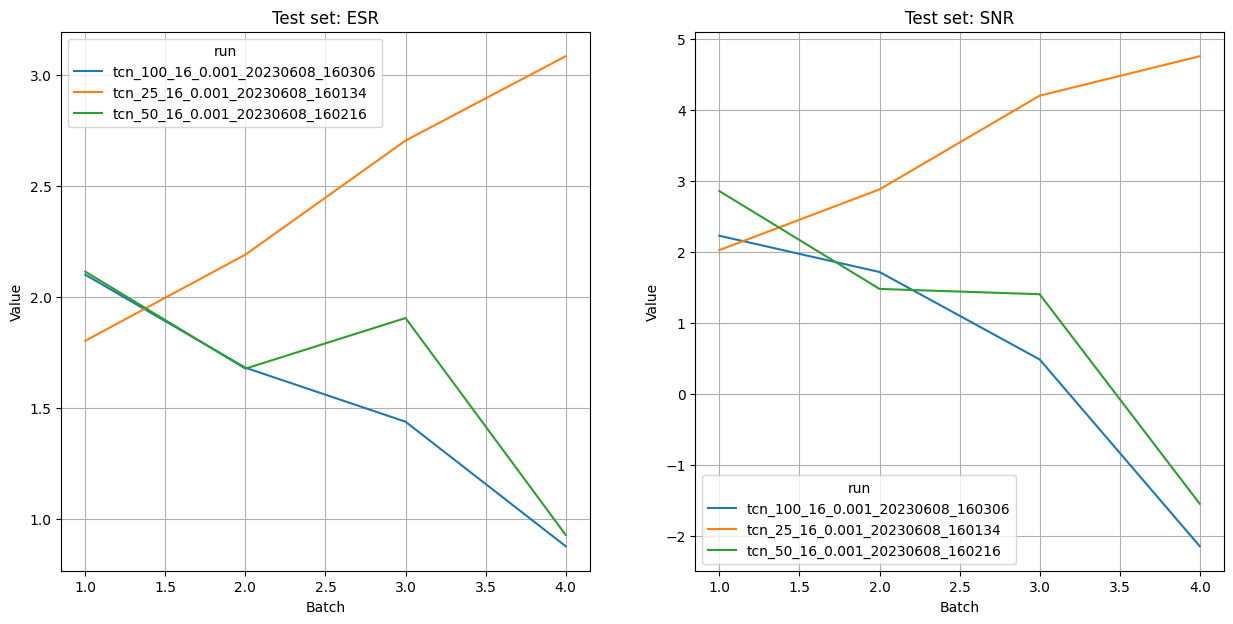

In [8]:
plt.figure(figsize=(15, 7))

# Training plot
plt.subplot(1, 2, 1)
sns.lineplot(data=df_dict['test/batch_esr'].reset_index(), x="step", y="value", hue='run').set_title("Test set: ESR")
# plt.ylim(0, 100)
# plt.xlim(0, 2000)
plt.grid(True)
plt.xlabel("Batch")
plt.ylabel("Value")
plt.xscale('linear')
plt.yscale('linear')

# Validation plot
plt.subplot(1, 2, 2)
sns.lineplot(data=df_dict['test/batch_snr'].reset_index(), x='step', y='value', hue='run').set_title("Test set: SNR")
# plt.ylim(0, 100)
# plt.xlim(0, 2000)
plt.grid(True)
plt.xlabel("Batch")
plt.ylabel("Value")
plt.xscale('linear')
plt.yscale('linear')

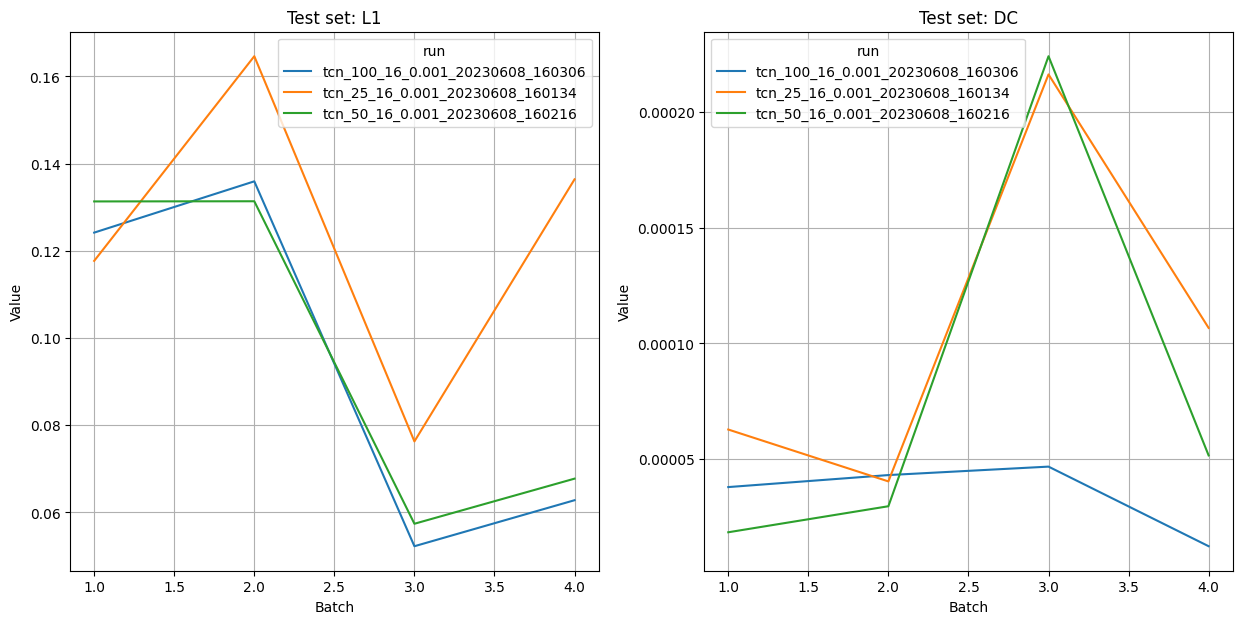

In [9]:
plt.figure(figsize=(15, 7))

# Training plot
plt.subplot(1, 2, 1)
sns.lineplot(data=df_dict['test/batch_l1'].reset_index(), x="step", y="value", hue='run').set_title("Test set: L1")
# plt.ylim(0, 100)
# plt.xlim(0, 2000)
plt.grid(True)
plt.xlabel("Batch")
plt.ylabel("Value")
plt.xscale('linear')
plt.yscale('linear')

# Validation plot
plt.subplot(1, 2, 2)
sns.lineplot(data=df_dict['test/batch_dc'].reset_index(), x='step', y='value', hue='run').set_title("Test set: DC")
# plt.ylim(0, 100)
# plt.xlim(0, 2000)
plt.grid(True)
plt.xlabel("Batch")
plt.ylabel("Value")
plt.xscale('linear')
plt.yscale('linear')

## Save to csv

In [10]:
# Save DataFrame to CSV
df.to_csv('01A_test.csv', index=False)
